In [1]:
import pandas as pd
import numpy as np

In [2]:
nba=pd.read_csv('nba_2013.csv',sep=',')

In [5]:
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


<img src="img8.png">

In [7]:
point_guards=nba[nba['pos']=='PG']
point_guards

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,115,130,313,53,3,125,147,930,2013-2014,2013
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,32,37,32,7,4,19,30,150,2013-2014,2013
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,138,154,303,26,0,125,129,660,2013-2014,2013
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,123,145,194,60,9,82,161,666,2013-2014,2013
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,146,159,307,54,8,102,85,378,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Russell Westbrook,PG,25,OKC,46,46,1412,346,791,0.437,...,208,263,319,88,7,177,104,1002,2013-2014,2013
462,Deron Williams,PG,29,BRK,64,58,2059,322,716,0.450,...,153,168,392,93,13,143,148,915,2013-2014,2013
465,Louis Williams,PG,27,ATL,60,7,1445,197,493,0.400,...,114,124,210,45,4,92,65,625,2013-2014,2013
467,Mo Williams,PG,31,POR,74,0,1834,280,672,0.417,...,111,153,321,55,10,149,197,721,2013-2014,2013


Nombre moyen de points par match des meneurs
==


In [8]:
pd.options.mode.chained_assignment=None

point_guards['ppg']= point_guards['pts']/point_guards['g']
# verifier que ppg=pts/g
point_guards[['pts','g','ppg']].head(5)

,pts,g,ppg
24,930,71,13.098592
29,150,20,7.500000
30,660,79,8.354430
38,666,72,9.250000
50,378,55,6.872727


<img src="img9.png">

In [12]:
point_guards=point_guards[point_guards['tov'] !=0]
point_guards['atr']=point_guards['ast']/point_guards['tov']

Visualiser graphiquement ces meneurs de jeux
==

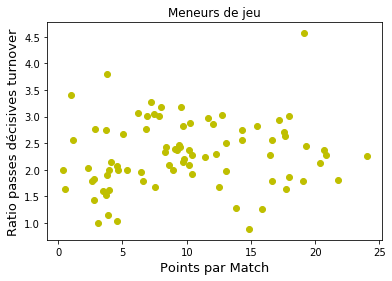

In [13]:
import matplotlib.pyplot as plt

plt.scatter(point_guards['ppg'], point_guards['atr'], c='yellow')
plt.title('Meneurs de jeu')
plt.xlabel('Points par Match', fontsize=13)
plt.ylabel('Ratio passes décisives turnover', fontsize=13)
plt.show()

<img src="img10.png">

In [17]:
import numpy as np
# Initialisation du nombre de cluster k, le plus difficile a savoir
num_clusters=5

# utiliser la fonction random de numpy pour générer une liste d'indices, 
# taille : num_clusters

random_initial_points=np.random.choice(point_guards.index, size=num_clusters)

# utiliser les indices aléatoires pour créer les centroides
centroids=point_guards.loc[random_initial_points]

Visualisation des centroides
==

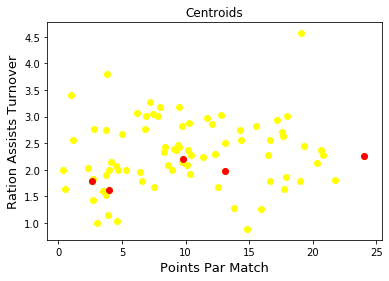

In [18]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title('Centroids')
plt.xlabel('Points Par Match',fontsize=13)
plt.ylabel('Ration Assists Turnover',fontsize=13)
plt.show()

<img src="img11.png">

In [20]:
def centroids_to_dict(centroids):
    dictionary=dict()
    
    #compteur iteratif utilisé pour générer un cluster_id
    counter=0
    
    # Iterer le dataframe en utilisant .iterrows() ligne par ligne
    for index, row in centroids.iterrows():
        coordinates=[row['ppg'],row['atr']]
        dictionary[counter]=coordinates
        counter +=1
        
    return dictionary

centroids_dict=centroids_to_dict(centroids)
centroids_dict

{0: [9.808219178082192, 2.2037037037037037],
 1: [13.0875, 1.9702380952380953],
 2: [3.962962962962963, 1.6296296296296295],
 3: [24.012820512820515, 2.2653061224489797],
 4: [2.6451612903225805, 1.793103448275862]}

Etape 1 (Distance euclidienne)
==

In [21]:
import math

def calculate_distance(centroid, player_values):
    root_distance=0
    
    for x in range(0,len(centroid)):
        difference=centroid[x] - player_values[x]
        squared_difference=difference **2
        root_distance += squared_difference
    
    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

In [24]:
# Tester la fonction 
p=[5,2]
q=[3,1]calculate_distance(p,q)

2.23606797749979

<img src="img12.png">

In [40]:
# Fonction assign_to_cluster ajoute la valeur de cluster correspondant ligne par ligne
def assign_to_cluster(row):
    lowest_distance=-1
    closest_cluster=-1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row=[row['ppg'], row['atr']]
        euclidean_distance= calculate_distance(centroid, df_row)
        
        if lowest_distance==-1:
            lowest_distance=euclidean_distance
            closest_cluster=cluster_id
        elif euclidean_distance < lowest_distance:
                lowest_distance=euclidean_distance
                closest_cluster=cluster_id
    return closest_cluster

point_guards['cluster']=point_guards.apply(lambda row: assign_to_cluster(row),axis=1)
point_guards.head(6)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,blk,tov,pf,pts,season,season_end,ppg,str,atr,cluster
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,3,125,147,930,2013-2014,2013,13.098592,2.504000,2.504000,1
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,4,19,30,150,2013-2014,2013,7.500000,1.684211,1.684211,0
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,0,125,129,660,2013-2014,2013,8.354430,2.424000,2.424000,0
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,9,82,161,666,2013-2014,2013,9.250000,2.365854,2.365854,0
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,8,102,85,378,2013-2014,2013,6.872727,3.009804,3.009804,0
52,Eric Bledsoe,PG,24,PHO,43,40,1416,265,556,0.477,...,14,143,99,763,2013-2014,2013,17.744186,1.643357,1.643357,1


Visualiser les clusters
==

In [36]:
def visualize_clusters(df,num_clusters):
    colors=['b','g','r','c','m','y','k']
    
    for n in range(num_clusters):
        clustered_df=df[df['cluster']==n]
        plt.scatter(clustered_df['ppg'],clustered_df['atr'],c=colors[n-1])
        plt.xlabel('Points Par Match', fontsize=13)
        plt.ylabel('Ratio Assists Turnover', fontsize=13)
        
    plt.show()

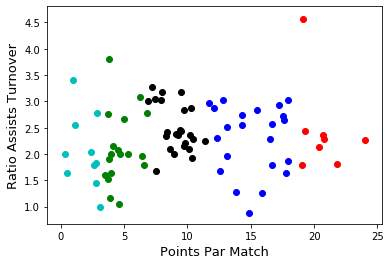

In [41]:
#  Tester la fonction pour num_cluster=5 comme définie des le début
visualize_clusters(point_guards,5)

<img src="img13.png">

In [43]:
def recalculate_centroids(df):
    new_centroids_dict=dict()
    #  0...1...2....3...4
    for cluster_id in range(0,num_clusters):
        values_in_cluster=df[df['cluster']==cluster_id]
        
        #  Calculer le nouveau centroid en utilisant la moyenne arithmétique des valeurs
        #  du cluster
        new_centroid=[np.average(values_in_cluster['ppg']),np.average(values_in_cluster['atr'])]
        
        new_centroids_dict[cluster_id]=new_centroid
    return new_centroids_dict
               
centroids_dict=recalculate_centroids(point_guards)
centroids_dict

    

{0: [9.081547425731463, 2.4953273335409367],
 1: [15.097770642094135, 2.2874014234804485],
 2: [4.704466290443905, 2.1053816652474446],
 3: [20.634057008119008, 2.4558021154262044],
 4: [1.9364859943977593, 2.0459780125506755]}

Répéter l'étape 1
==

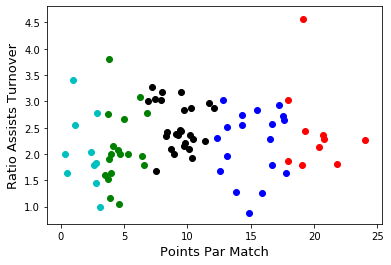

In [44]:
point_guards['cluster']=point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

Répéter l'étape 1 et 2
==

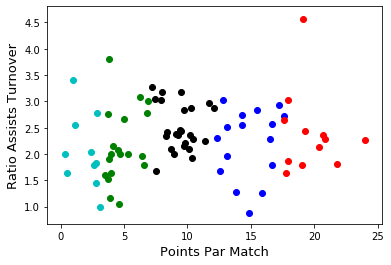

In [45]:
centroids_dict=recalculate_centroids(point_guards)
point_guards['cluster']=point_guards.apply(lambda row: assign_to_cluster(row),axis=1)
visualize_clusters(point_guards,num_clusters)

Utilisation de la classe KMeans
==

In [46]:
nba=pd.read_csv('nba_2013.csv',sep=',')
point_guards=nba[nba['pos']=='PG']
point_guards['ppg']= point_guards['pts']/point_guards['g']
point_guards=point_guards[point_guards['tov'] !=0]
point_guards['atr']=point_guards['ast']/point_guards['tov']

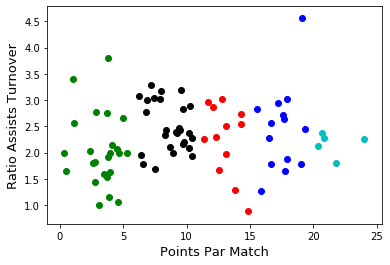

In [47]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg','atr']])
point_guards['cluster']=kmeans.labels_

visualize_clusters(point_guards, num_clusters)